In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import sys
import os

In [5]:
os.chdir("/Users/subinpark2/Downloads/ST47/")

In [5]:
%ls

ST_brian.table.csv  dic3.csv


In [6]:
df1=pd.read_csv("ST_brian.table.csv")
df2=pd.read_csv("dic3.csv",header=None,sep='\t')

In [7]:
#df1.head()
#type(df1['Assembly'])
df1['Assembly']=df1['Assembly'].apply(lambda x:x.split("_")[0]+x.split("_")[1])

In [8]:
df1.head()

,Assembly,ST,allele,allele.1,allele.2,allele.3,allele.4,allele.5,allele.6,?,?.1
0,GCF900048925,1.0,flaA-1,pilE-4,asd-3,mip-1,mompS-1,proA-1,neuA_neuAH-1,NaN,NaN
1,GCF900049255,1.0,flaA-1,pilE-4,asd-3,mip-1,mompS-1,proA-1,neuA_neuAH-1,NaN,NaN
2,GCF900050175,NaN,flaA-1,pilE-4,asd-3,mip-1,mompS-1,proA-1,neuA_neuAH-14,NaN,NaN
3,GCF900050205,1.0,flaA-1,pilE-4,asd-3,mip-1,mompS-1,proA-1,neuA_neuAH-1,NaN,NaN
4,GCF900050235,1.0,flaA-1,pilE-4,asd-3,mip-1,mompS-1,proA-1,neuA_neuAH-1,NaN,NaN


In [216]:
df2.head()

,0,1
0,GCF900051665.blast.pair,"['lpg0577_1', 'lpg1830_1', 'lpg1566_1', 'lpg22..."
1,GCF900063035.blast.pair,"['lpg0577_1', 'lpg1830_1', 'lpg1566_1', 'lpg22..."
2,GCF900054665.blast.pair,"['lpg0577_2', 'lpg1830_12', 'lpg1566_2', 'lpg2..."
3,GCF900064765.blast.pair,"['lpg0577_2', 'lpg1830_12', 'lpg1566_2', 'lpg2..."
4,GCF900062695.blast.pair,"['lpg0577_2', 'lpg1830_12', 'lpg1566_2', 'lpg2..."


In [9]:
df2.columns=['Assembly','subtype']

In [10]:
df2['Assembly']=df2['Assembly'].apply(lambda x :x.split(".")[:1])

In [11]:
df2['Assembly']=df2['Assembly'].map(lambda x: str(x)[:-2])
df2['Assembly']=df2['Assembly'].map(lambda x: str(x)[2:])

In [220]:
df2.head()

,Assembly,subtype
0,GCF900051665,"['lpg0577_1', 'lpg1830_1', 'lpg1566_1', 'lpg22..."
1,GCF900063035,"['lpg0577_1', 'lpg1830_1', 'lpg1566_1', 'lpg22..."
2,GCF900054665,"['lpg0577_2', 'lpg1830_12', 'lpg1566_2', 'lpg2..."
3,GCF900064765,"['lpg0577_2', 'lpg1830_12', 'lpg1566_2', 'lpg2..."
4,GCF900062695,"['lpg0577_2', 'lpg1830_12', 'lpg1566_2', 'lpg2..."


In [12]:
df3=pd.DataFrame(df2['subtype'].value_counts())
df3.reset_index(level=0, inplace=True)

In [13]:
df3.columns=['subtype','count']
df3['subnumber']=df3.index

In [223]:
df3.head()

,subtype,count,subnumber
0,"['lpg0577_2', 'lpg1830_12', 'lpg1566_2', 'lpg2...",84,0
1,"['lpg0577_11', 'lpg1830_11', 'lpg1566_10', 'lp...",41,1
2,"['lpg0577_2', 'lpg1830_17', 'lpg1566_15', 'lpg...",18,2
3,"['lpg0577_11', 'lpg1830_11', 'lpg1566_10', 'lp...",15,3
4,"['lpg0577_2', 'lpg1830_12', 'lpg1566_2', 'lpg2...",11,4


In [14]:
df4=pd.merge(df2,df3,on='subtype')

In [15]:
df5=pd.merge(df1,df4,on='Assembly')

In [226]:
df5.to_csv('compare_blast_50gene_st47.csv')

In [16]:
df5.head()

,Assembly,ST,allele,allele.1,allele.2,allele.3,allele.4,allele.5,allele.6,?,?.1,subtype,count,subnumber
0,GCF900048925,1.0,flaA-1,pilE-4,asd-3,mip-1,mompS-1,proA-1,neuA_neuAH-1,NaN,NaN,"['lpg0577_3', 'lpg1830_4', 'lpg1566_8', 'lpg22...",1,49
1,GCF900049255,1.0,flaA-1,pilE-4,asd-3,mip-1,mompS-1,proA-1,neuA_neuAH-1,NaN,NaN,"['lpg0577_3', 'lpg1830_15', 'lpg1566_8', 'lpg2...",2,36
2,GCF900050175,NaN,flaA-1,pilE-4,asd-3,mip-1,mompS-1,proA-1,neuA_neuAH-14,NaN,NaN,"['lpg0577_3', 'lpg1830_15', 'lpg1566_8', 'lpg2...",3,22
3,GCF900050205,1.0,flaA-1,pilE-4,asd-3,mip-1,mompS-1,proA-1,neuA_neuAH-1,NaN,NaN,"['lpg0577_3', 'lpg1830_15', 'lpg1566_8', 'lpg2...",4,16
4,GCF900050235,1.0,flaA-1,pilE-4,asd-3,mip-1,mompS-1,proA-1,neuA_neuAH-1,NaN,NaN,"['lpg0577_3', 'lpg1830_15', 'lpg1566_8', 'lpg2...",2,36


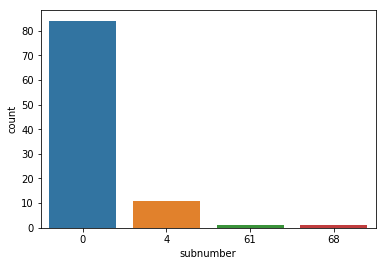

In [25]:
a=df5[['ST','subnumber','subtype']]
b=a[a['ST']==47]
sns.countplot(x='subnumber',data=b)

In [28]:
b=a[a['ST']==47]
b.to_csv("st47_number.csv")

In [228]:
df6=df5['subtype'].str.split(',', expand=True)

In [229]:
test=df5[['Assembly','subtype']]

In [230]:
test2=test['subtype'].str.split(',', expand=True).rename(columns = lambda x: "allele"+str(x+1))

In [231]:
test.head()

,Assembly,subtype
0,GCF900048925,"['lpg0577_3', 'lpg1830_4', 'lpg1566_8', 'lpg22..."
1,GCF900049255,"['lpg0577_3', 'lpg1830_15', 'lpg1566_8', 'lpg2..."
2,GCF900050175,"['lpg0577_3', 'lpg1830_15', 'lpg1566_8', 'lpg2..."
3,GCF900050205,"['lpg0577_3', 'lpg1830_15', 'lpg1566_8', 'lpg2..."
4,GCF900050235,"['lpg0577_3', 'lpg1830_15', 'lpg1566_8', 'lpg2..."


In [232]:
df6=df5['subtype'].str.split(',', expand=True).rename(columns = lambda x: "allele"+str(x+1))

In [233]:
df6.to_csv('allele_seperate.csv')

In [234]:
df6 = df6.rename(columns={col: col.split('_')[0] for col in df6.columns})

In [235]:
line=open('new_50gene.list')
header=print('\t')

In [236]:
df6.head()

,allele1,allele2,allele3,allele4,allele5,allele6,allele7,allele8,allele9,allele10,...,allele41,allele42,allele43,allele44,allele45,allele46,allele47,allele48,allele49,allele50
0,['lpg0577_3','lpg1830_4','lpg1566_8','lpg2231_9','lpg2339_4','lpg2516_13','lpg0287_11','lpg1398_11','lpg0461_15','lpg1206_6',...,'lpg0116_2','lpg0785_10','lpg0330_4','lpg1340_4','lpg0078_12','lpg1452_9','lpg0712_8','lpg1178_15','lpg2039_12','lpg1994_18']
1,['lpg0577_3','lpg1830_15','lpg1566_8','lpg2231_9','lpg2339_4','lpg2516_13','lpg0287_11','lpg1398_11','lpg0461_15','lpg1206_5',...,'lpg0116_2','lpg0785_10','lpg0330_4','lpg1340_4','lpg0078_12','lpg1452_9','lpg0712_5','lpg1178_15','lpg2039_12','lpg1994_17']
2,['lpg0577_3','lpg1830_15','lpg1566_8','lpg2231_9','lpg2339_4','lpg2516_14','lpg0287_10','lpg1398_11','lpg0461_15','lpg1206_6',...,'lpg0116_3','lpg0785_14','lpg0330_4','lpg1340_4','lpg0078_12','lpg1452_9','lpg0712_8','lpg1178_12','lpg2039_12','lpg1994_17']
3,['lpg0577_3','lpg1830_15','lpg1566_8','lpg2231_9','lpg2339_4','lpg2516_13','lpg0287_11','lpg1398_11','lpg0461_15','lpg1206_6',...,'lpg0116_2','lpg0785_10','lpg0330_4','lpg1340_4','lpg0078_12','lpg1452_9','lpg0712_8','lpg1178_15','lpg2039_12','lpg1994_17']
4,['lpg0577_3','lpg1830_15','lpg1566_8','lpg2231_9','lpg2339_4','lpg2516_13','lpg0287_11','lpg1398_11','lpg0461_15','lpg1206_5',...,'lpg0116_2','lpg0785_10','lpg0330_4','lpg1340_4','lpg0078_12','lpg1452_9','lpg0712_5','lpg1178_15','lpg2039_12','lpg1994_17']


In [237]:
df7=pd.merge(test,df6,on=test.index)
df7=df7.drop('subtype',axis=1)
df7=df7.drop(['key_0'],axis=1)

In [238]:
dic3=df7.set_index('Assembly').T.to_dict('list')
#for i in range(0,len(dic3.keys())-1):
    #for key in dic3:
        #print(dic3.get(key)[i])

In [239]:
df7.head()

,Assembly,allele1,allele2,allele3,allele4,allele5,allele6,allele7,allele8,allele9,...,allele41,allele42,allele43,allele44,allele45,allele46,allele47,allele48,allele49,allele50
0,GCF900048925,['lpg0577_3','lpg1830_4','lpg1566_8','lpg2231_9','lpg2339_4','lpg2516_13','lpg0287_11','lpg1398_11','lpg0461_15',...,'lpg0116_2','lpg0785_10','lpg0330_4','lpg1340_4','lpg0078_12','lpg1452_9','lpg0712_8','lpg1178_15','lpg2039_12','lpg1994_18']
1,GCF900049255,['lpg0577_3','lpg1830_15','lpg1566_8','lpg2231_9','lpg2339_4','lpg2516_13','lpg0287_11','lpg1398_11','lpg0461_15',...,'lpg0116_2','lpg0785_10','lpg0330_4','lpg1340_4','lpg0078_12','lpg1452_9','lpg0712_5','lpg1178_15','lpg2039_12','lpg1994_17']
2,GCF900050175,['lpg0577_3','lpg1830_15','lpg1566_8','lpg2231_9','lpg2339_4','lpg2516_14','lpg0287_10','lpg1398_11','lpg0461_15',...,'lpg0116_3','lpg0785_14','lpg0330_4','lpg1340_4','lpg0078_12','lpg1452_9','lpg0712_8','lpg1178_12','lpg2039_12','lpg1994_17']
3,GCF900050205,['lpg0577_3','lpg1830_15','lpg1566_8','lpg2231_9','lpg2339_4','lpg2516_13','lpg0287_11','lpg1398_11','lpg0461_15',...,'lpg0116_2','lpg0785_10','lpg0330_4','lpg1340_4','lpg0078_12','lpg1452_9','lpg0712_8','lpg1178_15','lpg2039_12','lpg1994_17']
4,GCF900050235,['lpg0577_3','lpg1830_15','lpg1566_8','lpg2231_9','lpg2339_4','lpg2516_13','lpg0287_11','lpg1398_11','lpg0461_15',...,'lpg0116_2','lpg0785_10','lpg0330_4','lpg1340_4','lpg0078_12','lpg1452_9','lpg0712_5','lpg1178_15','lpg2039_12','lpg1994_17']


In [240]:
for line in open("new_50gene.list"):
    line=line.rstrip()
    sys.stdout.write("\t"+line)
sys.stdout.write('\n')

1

In [241]:
sys.stdout=open('test_database4.csv','a')
for line in open("new_50gene.list"):
    line=line.rstrip()
    sys.stdout.write("\t"+line)
sys.stdout.write('\n')
for line in open('new_50gene.list'):
    line=line.rstrip()
    for key1 in dic3:
        sys.stdout.write(key1+"\t")
        for value in dic3[key1]:
            if str(line) in str(value):
                number=value.split("_")[1]
                sys.stdout.write(number+"\t")
            else:
               sys.stdout.write('Nan'+"\t")
        sys.stdout.write('\n')         

In [242]:
sys.stdout=open('test_database5.csv','a')
for line in open("new_50gene.list"):
    line=line.rstrip()
    sys.stdout.write('\t'+line)
sys.stdout.write('\n')
for line in open("new_50gene.list"):
    line=line.rstrip()
    for key in dic3:
        sys.stdout.write(key+"\t")
        for i in range(0,45):      
            if str(dic3.get(key)[i]).find(line) != 0:            
                sys.stdout.write(str(dic3.get(key)[i])+"\t")
            else:
                sys.stdout.write('nan'+"\t")
    sys.stdout.write('\n')

In [243]:
df7.head()

,Assembly,allele1,allele2,allele3,allele4,allele5,allele6,allele7,allele8,allele9,...,allele41,allele42,allele43,allele44,allele45,allele46,allele47,allele48,allele49,allele50
0,GCF900048925,['lpg0577_3','lpg1830_4','lpg1566_8','lpg2231_9','lpg2339_4','lpg2516_13','lpg0287_11','lpg1398_11','lpg0461_15',...,'lpg0116_2','lpg0785_10','lpg0330_4','lpg1340_4','lpg0078_12','lpg1452_9','lpg0712_8','lpg1178_15','lpg2039_12','lpg1994_18']
1,GCF900049255,['lpg0577_3','lpg1830_15','lpg1566_8','lpg2231_9','lpg2339_4','lpg2516_13','lpg0287_11','lpg1398_11','lpg0461_15',...,'lpg0116_2','lpg0785_10','lpg0330_4','lpg1340_4','lpg0078_12','lpg1452_9','lpg0712_5','lpg1178_15','lpg2039_12','lpg1994_17']
2,GCF900050175,['lpg0577_3','lpg1830_15','lpg1566_8','lpg2231_9','lpg2339_4','lpg2516_14','lpg0287_10','lpg1398_11','lpg0461_15',...,'lpg0116_3','lpg0785_14','lpg0330_4','lpg1340_4','lpg0078_12','lpg1452_9','lpg0712_8','lpg1178_12','lpg2039_12','lpg1994_17']
3,GCF900050205,['lpg0577_3','lpg1830_15','lpg1566_8','lpg2231_9','lpg2339_4','lpg2516_13','lpg0287_11','lpg1398_11','lpg0461_15',...,'lpg0116_2','lpg0785_10','lpg0330_4','lpg1340_4','lpg0078_12','lpg1452_9','lpg0712_8','lpg1178_15','lpg2039_12','lpg1994_17']
4,GCF900050235,['lpg0577_3','lpg1830_15','lpg1566_8','lpg2231_9','lpg2339_4','lpg2516_13','lpg0287_11','lpg1398_11','lpg0461_15',...,'lpg0116_2','lpg0785_10','lpg0330_4','lpg1340_4','lpg0078_12','lpg1452_9','lpg0712_5','lpg1178_15','lpg2039_12','lpg1994_17']


In [244]:
def removestring(column):
    return str(column.replace("[","").replace("]","")).replace("'","")

df7['allele1']=df7['allele1'].apply(removestring)
df7[::-1]

,Assembly,allele1,allele2,allele3,allele4,allele5,allele6,allele7,allele8,allele9,...,allele41,allele42,allele43,allele44,allele45,allele46,allele47,allele48,allele49,allele50
337,GCF900060375,lpg0577_10,'lpg1830_10','lpg1566_7','lpg2231_12','lpg2339_6','lpg2516_10','lpg0287_6','lpg1398_5','lpg0461_11',...,'lpg0116_20','lpg0785_7','lpg0330_6','lpg1340_2','lpg0078_8','lpg1452_13','lpg0712_3','lpg1178_18','lpg2039_21','lpg1994_16']
336,GCF900073035,lpg0577_2,'lpg1830_17','lpg1566_13','lpg2231_15','lpg2339_7','lpg2516_12','lpg0287_12','lpg1398_12','lpg0461_12',...,'lpg0116_13','lpg0785_1','lpg0330_5','lpg1340_14','lpg0078_13','lpg1452_4','lpg0712_14','lpg1178_12','lpg2039_18','lpg1994_13']
335,GCF900065915,lpg0577_2,'lpg1830_17','lpg1566_13','lpg2231_15','lpg2339_7','lpg2516_12','lpg0287_12','lpg1398_12','lpg0461_12',...,'lpg0116_13','lpg0785_1','lpg0330_5','lpg1340_14','lpg0078_13','lpg1452_4','lpg0712_14','lpg1178_12','lpg2039_18','lpg1994_13']
334,GCF900065905,lpg0577_2,'lpg1830_17','lpg1566_13','lpg2231_15','lpg2339_7','lpg2516_12','lpg0287_12','lpg1398_12','lpg0461_12',...,'lpg0116_13','lpg0785_1','lpg0330_5','lpg1340_14','lpg0078_13','lpg1452_4','lpg0712_16','lpg1178_12','lpg2039_18','lpg1994_13']
333,GCF900065445,lpg0577_2,'lpg1830_17','lpg1566_13','lpg2231_15','lpg2339_7','lpg2516_12','lpg0287_12','lpg1398_12','lpg0461_12',...,'lpg0116_13','lpg0785_1','lpg0330_5','lpg1340_14','lpg0078_13','lpg1452_4','lpg0712_14','lpg1178_12','lpg2039_18','lpg1994_13']
332,GCF900064385,lpg0577_2,'lpg1830_17','lpg1566_13','lpg2231_15','lpg2339_7','lpg2516_12','lpg0287_12','lpg1398_12','lpg0461_12',...,'lpg0116_13','lpg0785_1','lpg0330_5','lpg1340_14','lpg0078_13','lpg1452_4','lpg0712_14','lpg1178_12','lpg2039_18','lpg1994_13']
331,GCF900064375,lpg0577_2,'lpg1830_17','lpg1566_13','lpg2231_15','lpg2339_7','lpg2516_12','lpg0287_12','lpg1398_12','lpg0461_12',...,'lpg0116_13','lpg0785_1','lpg0330_5','lpg1340_14','lpg0078_13','lpg1452_4','lpg0712_14','lpg1178_12','lpg2039_18','lpg1994_13']
330,GCF900064365,lpg0577_2,'lpg1830_17','lpg1566_13','lpg2231_15','lpg2339_7','lpg2516_12','lpg0287_12','lpg1398_12','lpg0461_12',...,'lpg0116_13','lpg0785_1','lpg0330_5','lpg1340_14','lpg0078_13','lpg1452_4','lpg0712_14','lpg1178_12','lpg2039_18','lpg1994_13']
329,GCF900064355,lpg0577_2,'lpg1830_17','lpg1566_13','lpg2231_15','lpg2339_7','lpg2516_12','lpg0287_12','lpg1398_12','lpg0461_12',...,'lpg0116_13','lpg0785_1','lpg0330_5','lpg1340_14','lpg0078_13','lpg1452_4','lpg0712_14','lpg1178_12','lpg2039_18','lpg1994_13']
328,GCF900064345,lpg0577_2,'lpg1830_17','lpg1566_13','lpg2231_15','lpg2339_7','lpg2516_12','lpg0287_12','lpg1398_12','lpg0461_12',...,'lpg0116_13','lpg0785_1','lpg0330_5','lpg1340_14','lpg0078_13','lpg1452_4','lpg0712_14','lpg1178_12','lpg2039_18','lpg1994_13']


In [245]:
df7['allele45']=df7['allele45'].apply(removestring)
#df7['allele46']=df7['allele46'].apply(removestring)

In [246]:
df7.head()

,Assembly,allele1,allele2,allele3,allele4,allele5,allele6,allele7,allele8,allele9,...,allele41,allele42,allele43,allele44,allele45,allele46,allele47,allele48,allele49,allele50
0,GCF900048925,lpg0577_3,'lpg1830_4','lpg1566_8','lpg2231_9','lpg2339_4','lpg2516_13','lpg0287_11','lpg1398_11','lpg0461_15',...,'lpg0116_2','lpg0785_10','lpg0330_4','lpg1340_4',lpg0078_12,'lpg1452_9','lpg0712_8','lpg1178_15','lpg2039_12','lpg1994_18']
1,GCF900049255,lpg0577_3,'lpg1830_15','lpg1566_8','lpg2231_9','lpg2339_4','lpg2516_13','lpg0287_11','lpg1398_11','lpg0461_15',...,'lpg0116_2','lpg0785_10','lpg0330_4','lpg1340_4',lpg0078_12,'lpg1452_9','lpg0712_5','lpg1178_15','lpg2039_12','lpg1994_17']
2,GCF900050175,lpg0577_3,'lpg1830_15','lpg1566_8','lpg2231_9','lpg2339_4','lpg2516_14','lpg0287_10','lpg1398_11','lpg0461_15',...,'lpg0116_3','lpg0785_14','lpg0330_4','lpg1340_4',lpg0078_12,'lpg1452_9','lpg0712_8','lpg1178_12','lpg2039_12','lpg1994_17']
3,GCF900050205,lpg0577_3,'lpg1830_15','lpg1566_8','lpg2231_9','lpg2339_4','lpg2516_13','lpg0287_11','lpg1398_11','lpg0461_15',...,'lpg0116_2','lpg0785_10','lpg0330_4','lpg1340_4',lpg0078_12,'lpg1452_9','lpg0712_8','lpg1178_15','lpg2039_12','lpg1994_17']
4,GCF900050235,lpg0577_3,'lpg1830_15','lpg1566_8','lpg2231_9','lpg2339_4','lpg2516_13','lpg0287_11','lpg1398_11','lpg0461_15',...,'lpg0116_2','lpg0785_10','lpg0330_4','lpg1340_4',lpg0078_12,'lpg1452_9','lpg0712_5','lpg1178_15','lpg2039_12','lpg1994_17']


In [186]:
for i in range(0,45):
    df7.columns=['Assembly',df7.iloc[i,1:].apply(lambda x: str(x).split("_")[0].replace("'",''))]


ValueError: Length mismatch: Expected axis has 47 elements, new values have 2 elements

In [156]:
type(df7.iloc[1,1:])

pandas.core.series.Series

In [194]:
for i in range(0,45):
    df7.rename=['Assembly',df7.iloc[i,1:].apply(lambda x: str(x).split("_")[0])]

#df7.rename(columns=lambda x: x[1:], inplace=True)

In [248]:
df7.columns=df7.iloc[1,1:].apply(lambda x : str(x).split("_")[0])

ValueError: Length mismatch: Expected axis has 51 elements, new values have 50 elements

In [1]:
df7.iloc[1,1:].apply(lambda x : str(x).split("_")[0].replace("'",""))

NameError: name 'df7' is not defined

In [210]:
for i in range(0,len(df7.columns)):
    for j in range(0,len(df7.index)):
        df7.at[i,j]=df7.at[i,j].split("_")[0]

ValueError: At based indexing on an non-integer index can only have non-integer indexers

In [249]:
df7.head()

,Assembly,allele1,allele2,allele3,allele4,allele5,allele6,allele7,allele8,allele9,...,allele41,allele42,allele43,allele44,allele45,allele46,allele47,allele48,allele49,allele50
0,GCF900048925,lpg0577_3,'lpg1830_4','lpg1566_8','lpg2231_9','lpg2339_4','lpg2516_13','lpg0287_11','lpg1398_11','lpg0461_15',...,'lpg0116_2','lpg0785_10','lpg0330_4','lpg1340_4',lpg0078_12,'lpg1452_9','lpg0712_8','lpg1178_15','lpg2039_12','lpg1994_18']
1,GCF900049255,lpg0577_3,'lpg1830_15','lpg1566_8','lpg2231_9','lpg2339_4','lpg2516_13','lpg0287_11','lpg1398_11','lpg0461_15',...,'lpg0116_2','lpg0785_10','lpg0330_4','lpg1340_4',lpg0078_12,'lpg1452_9','lpg0712_5','lpg1178_15','lpg2039_12','lpg1994_17']
2,GCF900050175,lpg0577_3,'lpg1830_15','lpg1566_8','lpg2231_9','lpg2339_4','lpg2516_14','lpg0287_10','lpg1398_11','lpg0461_15',...,'lpg0116_3','lpg0785_14','lpg0330_4','lpg1340_4',lpg0078_12,'lpg1452_9','lpg0712_8','lpg1178_12','lpg2039_12','lpg1994_17']
3,GCF900050205,lpg0577_3,'lpg1830_15','lpg1566_8','lpg2231_9','lpg2339_4','lpg2516_13','lpg0287_11','lpg1398_11','lpg0461_15',...,'lpg0116_2','lpg0785_10','lpg0330_4','lpg1340_4',lpg0078_12,'lpg1452_9','lpg0712_8','lpg1178_15','lpg2039_12','lpg1994_17']
4,GCF900050235,lpg0577_3,'lpg1830_15','lpg1566_8','lpg2231_9','lpg2339_4','lpg2516_13','lpg0287_11','lpg1398_11','lpg0461_15',...,'lpg0116_2','lpg0785_10','lpg0330_4','lpg1340_4',lpg0078_12,'lpg1452_9','lpg0712_5','lpg1178_15','lpg2039_12','lpg1994_17']


In [266]:
df7.columns[1:]=line in open('new_50gene.list')

TypeError: Index does not support mutable operations

In [268]:
for line in open('new_50gene.list'):
    print1
    

NameError: name 'print1' is not defined